# Web Analytics Project Coding Summary

### BYGB 7978 – Web Analytics – Fall 2019
### Instructor: Professor Apostolos Filippas
### Topic: Auto portfolio Management
### Group Members: Letao Li, Yucheng Zhang, Ruiqi Chen, Hanzheng Wang

# 1. Scraping needed elements from Yahoo Finance

### The original S&P 500 stocks Symbol and sector details are from wikipedia, 'SP 500.csv'
### The stock symbols are use for generate the url address of each stock's statistics

In [1]:
import requests
import time     
import re      
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
df_sp500 = pd.read_csv("SP 500.CSV")
df_sp500

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",3/31/1964,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",12/31/2012,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",5/31/2018,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",7/6/2011,1467373,1989
5,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",8/31/2015,718877,2008
6,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",5/5/1997,796343,1982
7,AMD,Advanced Micro Devices Inc,reports,Information Technology,Semiconductors,"Sunnyvale, California",3/20/2017,2488,1969
8,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",7/9/2015,1158449,1932
9,AES,AES Corp,reports,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",10/2/1998,874761,1981


In [6]:
lines = list()
# collect all stocks'statistics page to list lines
for symbol in df_sp500['Symbol']:
    url = 'https://finance.yahoo.com/quote/' + symbol + '/key-statistics?p=' + symbol
    lines.append(url)
List=[]
for i in lines:
    try:
        result = requests.get(str(i))
    except:
        continue
    src = result.content
    soup = BeautifulSoup(src)
    #Name
    link_Name=soup.find_all('div',class_="Mt(15px)")
    for i in link_Name:
        Name=i.find("h1").text
        Namelist=Name.split("- ")
        symbol=Namelist[0]
        fullname=Namelist[1]
    # PEG Ration
    link_PEG = soup.find_all('tr',class_="Bxz(bb) H(36px) BdB Bdbc($seperatorColor) ks-row Bgc($extraLightBlue):h")
    for i in link_PEG:
        a = i.find("td",class_="Pos(st) Start(0) Bgc($lv2BgColor) ks-row:h_Bgc($extraLightBlue) Pend(10px)").text
        if a=="PEG Ratio (5 yr expected) 1":
            PEG=i.find("td",class_="Fz(s) Fw(500) Ta(end) Pstart(10px) Miw(60px)").string
    # Total Debt/Equity
    link_DE=soup.find_all("tr",class_="Bxz(bb) H(36px) BdB Bdbc($seperatorColor)")
    for i in link_DE:            
        a=i.find("span").text
        if a=="Total Debt/Equity":
            DE=i.find("td",class_="Fz(s) Fw(500) Ta(end) Pstart(10px) Miw(60px)").string
    # Return on Equity
    link_DE=soup.find_all("tr",class_="Bxz(bb) H(36px) BdB Bdbc($seperatorColor)")
    for i in link_DE:
        a=i.find("span").text
        if a=="Return on Equity":
            RE=i.find("td",class_="Fz(s) Fw(500) Ta(end) Pstart(10px) Miw(60px)").string
    #Margin        
    link_M=soup.find_all("tr",class_="Bxz(bb) H(36px) BdY Bdc($seperatorColor)")
    for i in link_M:       
        a=i.find("span").text
        if a =="Profit Margin":
            Margin=i.find("td",class_="Fz(s) Fw(500) Ta(end) Pstart(10px) Miw(60px)").string
    #Forward Annual Dividend Yield 4
    link_Yield=soup.find_all("tr",class_="Bxz(bb) H(36px) BdB Bdbc($seperatorColor)")
    for i in link_Yield:
        a=i.find("span").text
        if a=="Forward Annual Dividend Yield":
            Yield=i.find("td",class_="Fz(s) Fw(500) Ta(end) Pstart(10px) Miw(60px)").string
    List.append([symbol,fullname,PEG,DE,RE,Margin,Yield])

columns=["symbol","fullname","PEG","DE","RE","Margin","Yield"]
df1=pd.DataFrame(List,columns=columns)
df2=pd.read_csv("SP 500.CSV")
df1[["GICS_Sector"]]=df2[["GICS_Sector"]]
#Save the final out put into csv file
df1.to_csv('SP 500 Data.csv')

# 2. Use selected Financial Ratios to filter stocks

###     68 out 505 stocks are selected after first round selection

In [3]:
column = ['Symbol','Company name', 'PEG', 'Debt/Equity Ratio %','Return on Equity %','Profit Margin %','Dividend Yield %','Sector']
df = pd.read_csv('SP 500 Data.csv',sep=",", names = column, header = None)
df = df[0:]
df = df.reset_index().drop(columns=['index']).drop(columns = ['Debt/Equity Ratio %']).drop(columns = ['Dividend Yield %'])
df['PEG'] = df['PEG'].astype(float)
df['Return on Equity %'] = df['Return on Equity %'].replace('\%','', regex=True).replace('\,','', regex=True).astype(float)
df['Profit Margin %'] = df['Profit Margin %'].replace('\%','', regex=True).replace('\,','', regex=True).astype(float)
print(df.shape)
df.head()

(505, 6)


,Symbol,Company name,PEG,Return on Equity %,Profit Margin %,Sector
0,MMM,3M Company,23.09,47.08,15.48,Industrials
1,ABT,Abbott Laboratories,2.34,10.47,10.50,Health Care
2,ABBV,AbbVie Inc.,2.66,NaN,9.90,Health Care
3,ABMD,"Abiomed, Inc.",1.83,24.75,26.92,Health Care
4,ACN,Accenture plc,2.93,37.93,11.06,Information Technology


In [4]:
df = df.dropna()
df = df.reset_index().drop(columns=['index'])
print(df.shape)

(478, 6)


In [5]:
# Add industry average Profit Margin in to dataframe
df_dy = df[['Sector']]
df_dy[['Profit Margin %']] = df[['Profit Margin %']]
df_dy = df_dy.groupby('Sector').mean()
df['Industry Avg PM'] = df_dy.loc[df['Sector']].values

C:\Users\Letao\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [6]:
# Remove stocks ROE less than 16.7
df = df[df['Return on Equity %'] > 16.7]
print(df.shape)
# Remove stocks PEG greater than 2.5
df = df[df['PEG'] < 2.5]
print(df.shape)
# Remove stocks PM less than its industry average PM
df = df[df['Profit Margin %'] > df['Industry Avg PM']]
print(df.shape)
df = df.reset_index().drop(columns=['index'])

(221, 7)
(129, 7)
(68, 7)


# 3. Revome Financial Ratios outlier and convert Financial Ratios to scaling format (0-1)

In [7]:

for i in range(len(df['Return on Equity %'])):
    if df['Return on Equity %'][i] > 60:
        df['Return on Equity %'][i] = 60

df['Variance PM %'] = (df['Profit Margin %']-df['Industry Avg PM'])/df['Industry Avg PM']
df['Scale PEG'] = (df['PEG'].max()-df['PEG']-df['PEG'].min())/(df['PEG'].max()-df['PEG'].min())
df['Scale ROE'] = (df['Return on Equity %']-df['Return on Equity %'].min())/(df['Return on Equity %'].max()-df['Return on Equity %'].min())

for i in range(len(df['Variance PM %'])):
    if df['Variance PM %'][i] > 2:
        df['Variance PM %'][i] = 2

df['Scale VPM'] = (df['Variance PM %']-df['Variance PM %'].min())/(df['Variance PM %'].max()-df['Variance PM %'].min())

for i in range(len(df['Scale PEG'])):
    if df['Scale PEG'][i] > 1:
        df['Scale PEG'][i] = 1
df

C:\Users\Letao\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Letao\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Letao\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Symbol,Company name,PEG,Return on Equity %,Profit Margin %,Sector,Industry Avg PM,Variance PM %,Scale PEG,Scale ROE,Scale VPM
0,ABMD,"Abiomed, Inc.",1.83,24.75,26.92,Health Care,13.007069,1.069644,0.716279,0.185160,0.532941
1,ADBE,Adobe Inc.,2.01,29.08,26.10,Information Technology,17.483906,0.492801,0.688372,0.285252,0.243354
2,ALB,Albemarle Corporation,1.44,16.74,16.27,Materials,12.059200,0.349177,0.776744,0.000000,0.171252
3,GOOG,Alphabet Inc.,2.21,17.88,21.04,Communication Services,13.856538,0.518417,0.657364,0.026352,0.256214
4,AMGN,Amgen Inc.,2.27,60.00,34.48,Health Care,13.007069,1.650866,0.648062,1.000000,0.824727
5,AAPL,Apple Inc.,2.04,55.92,21.24,Information Technology,17.483906,0.214831,0.683721,0.905687,0.103808
6,AMAT,"Applied Materials, Inc.",1.76,35.95,18.52,Information Technology,17.483906,0.059260,0.727132,0.444059,0.025707
7,ANET,"Arista Networks, Inc.",2.23,33.44,31.36,Information Technology,17.483906,0.793650,0.654264,0.386038,0.394386
8,BAX,Baxter International Inc.,2.33,19.01,14.28,Health Care,13.007069,0.097865,0.638760,0.052473,0.045088
9,BIIB,Biogen Inc.,1.69,38.87,37.91,Health Care,13.007069,1.914569,0.737984,0.511558,0.957112


In [8]:
# store the data of 68 selected stocks for future use
df.to_csv('68 stocks.csv')

# 4. Scraping press-releases of selected 68 stocks

In [15]:
df=pd.read_csv('68 stocks.csv',sep=',')
df.shape
Symbol=df['Symbol']

pageUrls=[]
for n in Symbol:
    pageUrl ='https://finance.yahoo.com/quote/'+ n.strip() + '/press-releases?p='+ n   
    pageUrls.append(pageUrl)

def get_url_in_soup(url):
    #try to scrape 5 times
    for i in range(1,6):
        try:
            result = requests.get(url)
            src = result.content
            break
        except:
            print('Failed attempt #',i)
            # wait 2 secs before trying again
            time.sleep(2)
    soup = BeautifulSoup(src)
    return soup

press_release = list()
i = 59
for page in pageUrls:
    j = 0
    soup = get_url_in_soup(page)
    sym = Symbol[i]
    articles = soup.find_all('h3',{'class':'Mb(5px)'})
    #print(len(articles),'articles')
    for article in articles:
        content = ''
        pr_url = 'https://finance.yahoo.com/' + article.find('a')['href']
        article_soup = get_url_in_soup(pr_url)
        try:
            name = article_soup.find('h1',{'class':'Lh(36px) Fz(25px)--sm Fz(32px) Mb(17px)--sm Mb(20px) Mb(30px)--lg Ff($ff-primary) Lts($lspacing-md) Fw($fweight) Fsm($fsmoothing) Fsmw($fsmoothing) Fsmm($fsmoothing) Wow(bw)'}).text.strip()
        except:
            print([i, sym, j, 'name'])
            j += 1
            continue
        try:
            date = article_soup.find('time',{'itemprop':'datePublished'}).text.strip()
        except:
            print([i, sym, j, 'date'])
            j += 1
            continue
        try:
            text = article_soup.find_all('p',{'class':'canvas-atom canvas-text Mb(1.0em) Mb(0)--sm Mt(0.8em)--sm'})
        except:
            print([i, sym, j, 'text'])
            j += 1
            continue
        for ct in text:
            content += ct.text.strip()
        press_release.append([sym, name, date, content])
        #print([i, name, date, content])
        #print([i, sym, j])
        j += 1
    i += 1

# save all news to csv file for future use
df_pr=pd.DataFrame(press_release, columns=['Symbol', 'Title', 'Date', 'Content'])
df_pr.to_csv('Press Release 68.csv')

In [9]:
# Read press release news
df_news = pd.read_csv('Press Release 68.csv', encoding = 'latin1')
df_news = df_news.drop(columns = 'Unnamed: 0')
df_news = df_news.dropna().reset_index().drop(columns=['index'])
print(df_news.shape)
df_news.head()

(1409, 4)


,Symbol,Title,Date,Content
0,ABMD,Abiomed to Present at the 31st Annual Piper Ja...,27-Nov-19,"DANVERS, Mass.--(BUSINESS WIRE)--Abiomed, Inc...."
1,ABMD,Abiomed Medical Office Completes Review of Obs...,19-Nov-19,"DANVERS, Mass.--(BUSINESS WIRE)--Abiomed (ABMD..."
2,ABMD,Clinical Review Demonstrates Cost-Effectivenes...,14-Nov-19,"DANVERS, Mass.--(BUSINESS WIRE)--To mark the f..."
3,ABMD,"Lawsuit for Investors in Abiomed, Inc. (NASDAQ...",12-Nov-19,"SAN DIEGO, CA / ACCESSWIRE / November 12, 2019..."
4,ABMD,First U.S. Patients Treated with Impella 5.5 w...,31-Oct-19,"DANVERS, Mass.--(BUSINESS WIRE)--Three cardiac..."


# 5. Apply sentiments analysis for the news of stocks

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer #Vader 
from nltk.tokenize import sent_tokenize, word_tokenize

sentiment=[]
sid = SentimentIntensityAnalyzer()
for sentence in df_news['Content']:
    ss = sid.polarity_scores(str(sentence))
    sentiment.append(ss)
    #for k in ss:
         #print('{0}: {1},  '.format(k, ss[k]), end='')
    #print()
df_s = pd.DataFrame(sentiment)
df_news['pos_score'] = df_s['pos']
df_news['neu_score'] = df_s['neu']
df_news['neg_socre'] = df_s['neg']
df_news['comp_score'] = df_s['compound']
df_news

,Symbol,Title,Date,Content,pos_score,neu_score,neg_socre,comp_score
0,ABMD,Abiomed to Present at the 31st Annual Piper Ja...,27-Nov-19,"DANVERS, Mass.--(BUSINESS WIRE)--Abiomed, Inc....",0.079,0.872,0.049,0.8168
1,ABMD,Abiomed Medical Office Completes Review of Obs...,19-Nov-19,"DANVERS, Mass.--(BUSINESS WIRE)--Abiomed (ABMD...",0.112,0.831,0.058,0.9986
2,ABMD,Clinical Review Demonstrates Cost-Effectivenes...,14-Nov-19,"DANVERS, Mass.--(BUSINESS WIRE)--To mark the f...",0.132,0.803,0.065,0.9988
3,ABMD,"Lawsuit for Investors in Abiomed, Inc. (NASDAQ...",12-Nov-19,"SAN DIEGO, CA / ACCESSWIRE / November 12, 2019...",0.097,0.875,0.028,0.9274
4,ABMD,First U.S. Patients Treated with Impella 5.5 w...,31-Oct-19,"DANVERS, Mass.--(BUSINESS WIRE)--Three cardiac...",0.115,0.819,0.065,0.9919
5,ABMD,Abiomed Announces Q2 FY 2020 Revenue of $205 M...,31-Oct-19,"DANVERS, Mass.--(BUSINESS WIRE)--Abiomed, Inc....",0.133,0.835,0.032,0.9985
6,ABMD,"ABIOMED, Inc. to Host Earnings Call",31-Oct-19,"NEW YORK, NY / ACCESSWIRE / October 31, 2019 /...",0.041,0.959,0.000,0.7269
7,ABMD,CORRECTING and REPLACING CAPTION FDA Post Appr...,26-Oct-19,DETROIT--(BUSINESS WIRE)--Please replace the c...,0.109,0.811,0.080,0.9931
8,ABMD,CORRECTING and REPLACING GRAPHIC FDA Post Appr...,25-Oct-19,DETROIT--(BUSINESS WIRE)--Please replace the g...,0.109,0.812,0.080,0.9931
9,ABMD,Abiomed Second Quarter Fiscal 2020 Earnings an...,10-Oct-19,"DANVERS, Mass.--(BUSINESS WIRE)--Abiomed, Inc....",0.073,0.888,0.040,0.8395


# 6. Add the average comp_score of sentiment analysis into selected 68 stocks

In [11]:
df_score = df_news[['Symbol']]
df_score[['News_Score']] = df_news[['comp_score']]
df_score = df_score.groupby('Symbol').mean()

print(df_news['comp_score'].min(), df_news['comp_score'].max(), df_news['comp_score'].mean())


-0.9998 0.9999 0.8317078069552877


C:\Users\Letao\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


### Since the average comp_score is 0.83, and the news score above 0 can be considered as positive, thus we choose 0.8 as the standerd and removed stocks which comp_score is below it. 

### 52 stocks left after remove low comp_score stocks

In [12]:
df=pd.read_csv('68 stocks.csv',sep=',', index_col=0)
df['News_score'] = df_score.loc[df['Symbol']].values
df = df[df['News_score'] > 0.8]
print(df.shape)

(52, 12)


### Add rating and rank at into the dataframe

In [13]:
df['Rating'] = df['Scale PEG']*0.25 + df['Scale ROE']*0.35 + df['Scale VPM']*0.2 + df['News_score']*0.2
df['Rating Rank'] = df['Rating'].rank(ascending=False).astype(int)
df_final = df.sort_values(by=['Rating Rank'])[:20].reset_index().drop(columns=['index'])
df_final.to_csv('Final 20.csv')
df_final

,Symbol,Company name,PEG,Return on Equity %,Profit Margin %,Sector,Industry Avg PM,Variance PM %,Scale PEG,Scale ROE,Scale VPM,News_score,Rating,Rating Rank
0,BKNG,Booking Holdings Inc.,1.58,54.58,29.05,Consumer Discretionary,8.293220,2.000000,0.755039,0.874711,1.000000,0.960795,0.887068,1
1,AMGN,Amgen Inc.,2.27,60.00,34.48,Health Care,13.007069,1.650866,0.648062,1.000000,0.824727,0.979892,0.872939,2
2,VNO,Vornado Realty Trust,0.25,45.04,147.73,Real Estate,28.165806,2.000000,0.961240,0.654184,1.000000,0.926117,0.854498,3
3,MA,Mastercard Incorporated,2.21,60.00,42.50,Information Technology,17.483906,1.430807,0.657364,1.000000,0.714253,0.956492,0.848490,4
4,VRTX,Vertex Pharmaceuticals Incorporated,1.55,51.75,59.24,Health Care,13.007069,2.000000,0.759690,0.809293,1.000000,0.838492,0.840873,5
5,HRB,"H&R Block, Inc.",1.16,60.00,13.71,Consumer Discretionary,8.293220,0.653158,0.820155,1.000000,0.323857,0.960795,0.811969,6
6,COG,Cabot Oil & Gas Corporation,0.29,37.57,36.91,Energy,4.006786,2.000000,0.955039,0.481507,1.000000,0.966678,0.800623,7
7,ORLY,"O'Reilly Automotive, Inc.",1.67,60.00,13.69,Consumer Discretionary,8.293220,0.650746,0.741085,1.000000,0.322646,0.951568,0.790114,8
8,LLY,Eli Lilly and Company,1.93,49.34,31.91,Health Care,13.007069,1.453281,0.700775,0.753583,0.725536,0.981914,0.780438,9
9,CPRT,"Copart, Inc.",1.40,38.67,32.59,Industrials,10.965313,1.972100,0.782946,0.506935,0.985993,0.985200,0.767402,10


# 7. Define the final weight of investment by Markowitz's theory

In [2]:
import pandas as pd
from functools import reduce
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import json
%config InlineBackend.figure_format = 'retina'

In [4]:
stocks=pd.read_csv(r'/Users/rachelchen/Desktop/web final project/Final 20 stocks.csv')
ticker_list=list(stocks['Symbol'])
dfs=[]
for i in stocks['Symbol']:
    dfs.append(pd.read_csv('/Users/rachelchen/Desktop/web final project/SYMBOL/'+i.strip()+".csv")[['Date','Adj Close']].rename(columns={'Adj Close':i}))
df_final = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).set_index('Date')
StockPrices = df_final

In [5]:
StockReturns = StockPrices.pct_change().dropna()

In [6]:
number = 10000
random_p = np.empty((number, 22))
np.random.seed(123)

for i in range(number):
    random9 = np.random.random(20)
    random_weight = random9 / np.sum(random9)
    
    mean_return = StockReturns.mul(random_weight, axis=1).sum(axis=1).mean()
    annual_return = (1 + mean_return)**252 - 1

    cov_mat = StockReturns.cov()
    cov_mat_annual = cov_mat * 252
    random_volatility = np.sqrt(np.dot(random_weight.T, 
                                       np.dot(cov_mat_annual, random_weight)))

    random_p[i][:20] = random_weight
    random_p[i][20] = annual_return
    random_p[i][21] = random_volatility
    
RandomPortfolios = pd.DataFrame(random_p)
RandomPortfolios.columns = [ticker + "_weight" for ticker in ticker_list]  \
                         + ['Returns', 'Volatility']

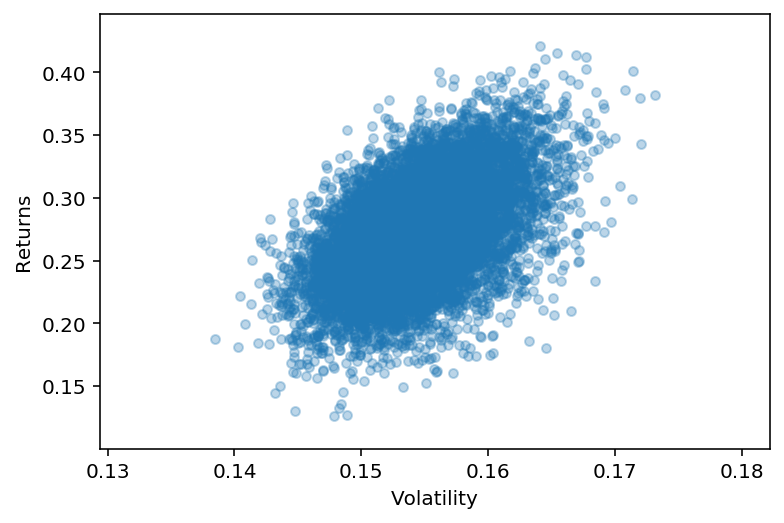

In [7]:
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
plt.show()

In [8]:
risk_free = 0

RandomPortfolios['Sharpe'] = (RandomPortfolios.Returns - risk_free)   \
                            / RandomPortfolios.Volatility

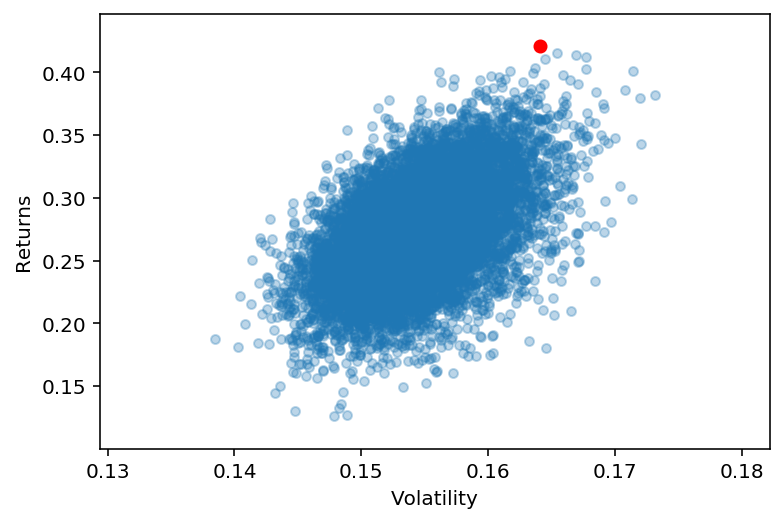

In [9]:
max_index = RandomPortfolios.Sharpe.idxmax()

RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
x = RandomPortfolios.loc[max_index,'Volatility']
y = RandomPortfolios.loc[max_index,'Returns']
plt.scatter(x, y, color='red')   
plt.show()

In [10]:
numstocks = 20
MSR_weights = np.array(RandomPortfolios.iloc[max_index, 0:numstocks])
Statics=pd.DataFrame()
Statics['Portfolio_MSR'] = StockReturns.mul(MSR_weights, axis=1).sum(axis=1)
a = json.dumps({RandomPortfolios.columns[i]:MSR_weights[i] for i in range(len(MSR_weights))},indent=2)
print(a)

{
  "BKNG _weight": 0.0055982284036129315,
  "AMGN _weight": 0.029877012797887938,
  "VNO _weight": 0.03514943816548228,
  "MA _weight": 0.09832660977010131,
  "VRTX _weight": 0.02919540851923808,
  "HRB _weight": 0.01013598312712611,
  "COG _weight": 0.02052362587411439,
  "ORLY _weight": 0.01336619816484844,
  "LLY _weight": 0.07810828172054567,
  "CPRT _weight": 0.10898665608130406,
  "QCOM _weight": 0.10896030600408316,
  "BIIB _weight": 0.028089171363160692,
  "TXN _weight": 0.045619882477450864,
  "MCO _weight": 0.09867188425684481,
  "V _weight": 0.09081550563040007,
  "EBAY _weight": 0.0038549562519912765,
  "AAPL _weight": 0.061481493027574316,
  "NKE _weight": 0.06277114140990296,
  "MSFT _weight": 0.04964017674419839,
  "MNST _weight": 0.020828040210132376
}


In [11]:
def cumulative_returns_plot(name_list):
    for name in name_list:
        CumulativeReturns = ((1+Statics[name]).cumprod()-1)
        CumulativeReturns.plot(label=name)
    plt.legend()
    plt.show()

In [12]:
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
Statics['Portfolio_EW'] = StockReturns.mul(portfolio_weights_ew, axis=1).sum(axis=1)

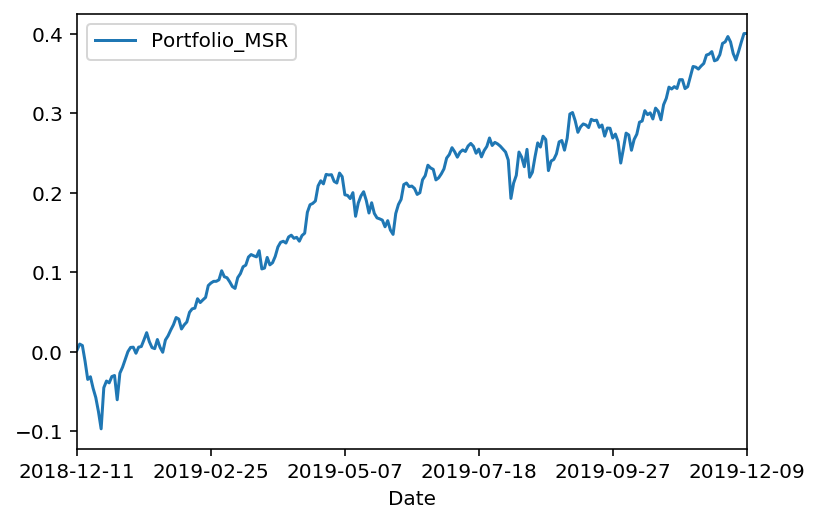

In [13]:
cumulative_returns_plot(['Portfolio_MSR'])

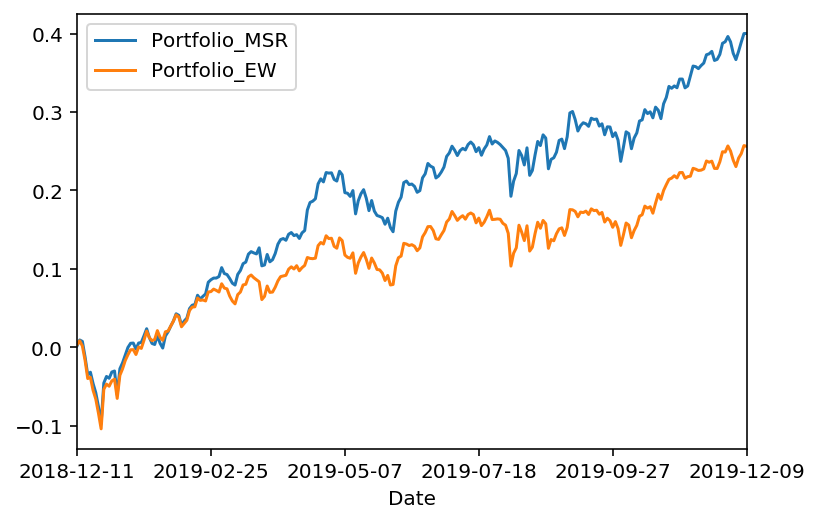

In [14]:
cumulative_returns_plot(['Portfolio_MSR','Portfolio_EW'])

In [15]:
df_info=pd.DataFrame({RandomPortfolios.columns[i]:[MSR_weights[i]] for i in range(len(MSR_weights))}).T
df_info.set_index(df_info.index.map(lambda x:x.split()[0]), inplace=True)
df_info['gold']=(df_info[0]*1000000)#.map(lambda x:int(round(x)))

In [16]:
oneday=StockPrices.loc['2019-11-01']
oneday=oneday.reset_index()
oneday['purgedindex']=oneday['index'].map(lambda x:x.split()[0])
df_info=df_info.merge(oneday,how='left',left_index=True,right_on='purgedindex')

In [17]:
df_info['count']=(df_info['gold']/df_info['2019-11-01']).map(lambda x:int(round(x)))
df_info['updated_gold']=df_info['count']*df_info['2019-11-01']

In [18]:
df_cinfo=df_info[[0,'2019-11-01','count','updated_gold','purgedindex']].set_index('purgedindex')

In [19]:
df_cinfo=df_cinfo.rename(columns={0:'rate','2019-11-01':'price at 2019-11-01','count':'count','updated_gold':'gold'})

In [20]:
df_cinfo.to_excel('68.xlsx')

In [21]:
dfsp=pd.read_csv('GSPC.csv').set_index('Date')

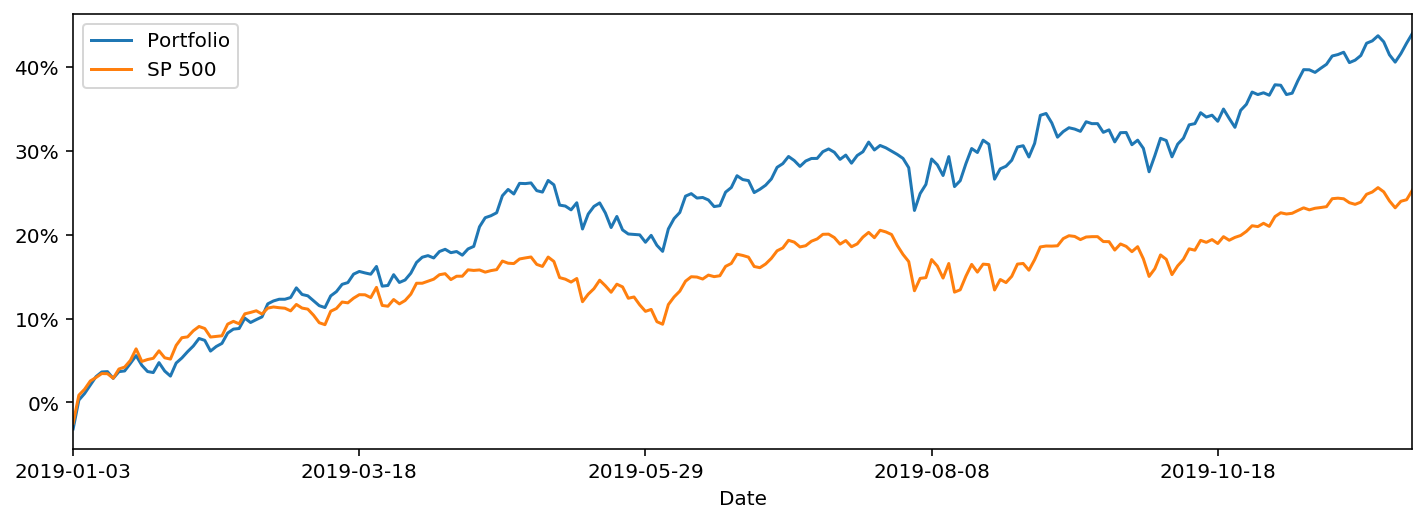

In [23]:
start='2019-01-02'
df_info=pd.DataFrame({RandomPortfolios.columns[i]:[MSR_weights[i]] for i in range(len(MSR_weights))}).T
df_info.set_index(df_info.index.map(lambda x:x.split()[0]), inplace=True)
df_info['gold']=(df_info[0]*1000000)#.map(lambda x:int(round(x)))
oneday=StockPrices.loc[start]
oneday=oneday.reset_index()
oneday['purgedindex']=oneday['index'].map(lambda x:x.split()[0])
df_info=df_info.merge(oneday,how='left',left_index=True,right_on='purgedindex')
df_info['count']=(df_info['gold']/df_info[start]).map(lambda x:int(round(x)))
df_info['updated_gold']=df_info['count']*df_info[start]
following=StockPrices.loc[start:'2019-12-06'].T
spbase=dfsp.loc[start]['Adj Close']
sprev=[]
revenus=[]
rev_dates=[]
for k,v in following.iteritems():
    if k==start:
        continue
    df_test=df_info.merge(v,how='left',left_on='index',right_index=True)
    rev_dates.append(k)
    revenus.append(((df_test[k]-df_test[start])*df_test['count']).sum()/10000)
    sprev.append(100*(dfsp.loc[k]['Adj Close']/spbase-1))
ax=pd.DataFrame({'Date':rev_dates,'Portfolio':revenus,'SP 500':sprev}).set_index('Date').plot(figsize=(12,4))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()